## Import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import math

DATA_FILE = "../agribalyse_data.csv"
TARGET = "Changement climatique"

## Analyse du dataset

In [2]:
original_data = pd.read_csv(DATA_FILE)
df = original_data.copy()
print(df.shape)
df

(14956, 32)


,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,code saison,code avion,Livraison,Approche emballage,...,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux,Changement climatique - émissions biogéniques,Changement climatique - émissions fossiles,Changement climatique - émissions liées au changement d'affectation des sols
0,11172,11172.0,aides culinaires et ingrédients divers,aides culinaires,"Court-bouillon pour poissons, déshydraté","Aromatic stock cube, for fish, dehydrated",2.0,0.0,Ambiant (long),PACK PROXY,...,0.02680,0.1370,70.2,106.0,3.380,700.0,0.000051,0.1040,7.460,0.02120
1,25525,25525.0,aides culinaires et ingrédients divers,aides culinaires,"Pizza, sauce garniture pour",Topping sauce for pizza,2.0,0.0,Ambiant (long),PACK PROXY,...,0.00416,0.0303,11.0,67.7,2.470,24.4,0.000006,0.0336,1.020,-0.10800
2,11214,11214.0,aides culinaires et ingrédients divers,aides culinaires,"Préparation culinaire à base de soja, type ""cr...","Soy ""cream"" preparation",2.0,0.0,Ambiant (long),PACK PROXY,...,0.00723,0.0244,30.8,116.0,0.422,22.4,0.000004,0.0252,0.965,0.18400
3,11084,11084.0,aides culinaires et ingrédients divers,algues,"Agar (algue), cru","Seaweed, agar, raw",2.0,0.0,Ambiant (long),PACK PROXY,...,0.01500,0.1440,57.9,26.7,4.830,396.0,0.000079,0.0401,11.700,0.00655
4,20995,20995.0,aides culinaires et ingrédients divers,algues,"Ao-nori (Enteromorpha sp.), séchée ou déshydratée","Sea lettuce (Enteromorpha sp.), dried or dehyd...",2.0,0.0,Ambiant (long),PACK PROXY,...,0.01500,0.1440,57.9,26.7,4.830,396.0,0.000079,0.0401,11.700,0.00655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On remarque **83.6%** de valeurs nulles. Par contre toutes les colonnes comporte le même nombre de NaN (12505), donc voyons la répartition des NaN.

Le but est de savoir si on doit avoir recours à une méthode conservative (**fillna()**) ou destructive (**dropna()**)

In [3]:
short_names = {
    'Code AGB': 'code_agb',
    'Code CIQUAL': 'code_ciqual',
    "Groupe d'aliment": 'groupe_alim',
    "Sous-groupe d'aliment": 'sousgroupe_alim',
    'Nom du Produit en Français': 'nom_fr',
    'LCI Name': 'lci_name',
    'code saison': 'saison',
    'code avion': 'avion',
    'Livraison': 'livraison',
    'Approche emballage ': 'emballage',
    'Préparation': 'preparation',
    'DQR': 'dqr',
    'Score unique EF': 'score_ef',
    'Changement climatique': 'climat',
    "Appauvrissement de la couche d'ozone": 'ozone',
    'Rayonnements ionisants': 'rayons_ionisants',
    "Formation photochimique d'ozone": 'photochimie_ozone',
    'Particules fines': 'particules_fines',
    'Effets toxicologiques sur la santé humaine\xa0: substances non-cancérogènes': 'toxico_non_cancer',
    'Effets toxicologiques sur la santé humaine\xa0: substances cancérogènes': 'toxico_cancer',
    'Acidification terrestre et eaux douces': 'acidification',
    'Eutrophisation eaux douces': 'eutrophisation_e_douce',
    'Eutrophisation marine': 'eutrophisation_marine',
    'Eutrophisation terrestre': 'eutrophisation_terrestre',
    "Écotoxicité pour écosystèmes aquatiques d'eau douce": 'ecotox_e_douce',
    'Utilisation du sol': 'util_sol',
    'Épuisement des ressources eau': 'epuis_eau',
    'Épuisement des ressources énergétiques': 'epuis_energie',
    'Épuisement des ressources minéraux': 'epuis_mineraux',
    'Changement climatique - émissions biogéniques': 'climat_biog',
    'Changement climatique - émissions fossiles': 'climat_fossile',
    "Changement climatique - émissions liées au changement d'affectation des sols": 'climat_sols'
}
df.rename(columns=short_names, inplace=True)
TARGET = 'climat'

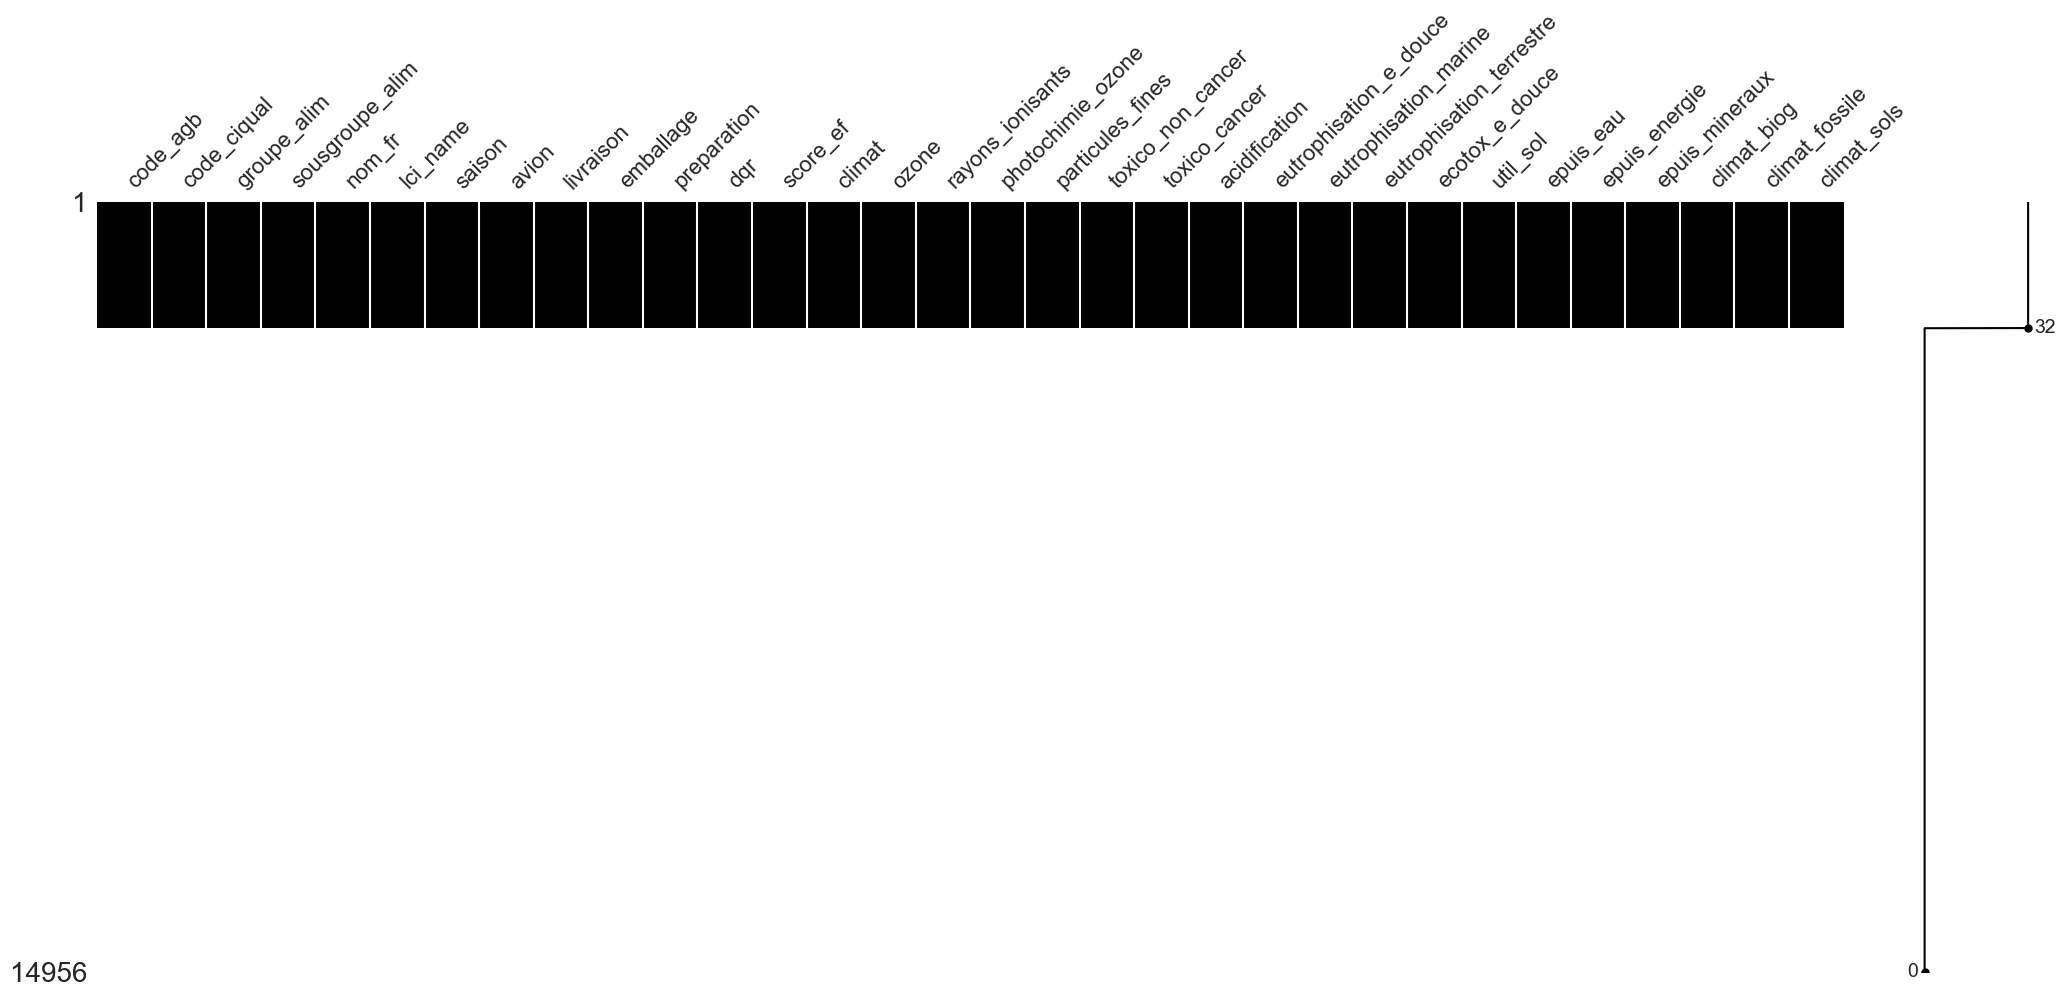

Toutes les colonnes ont bien le même nombres de NaN ? Oui
Nombre de données exploitable :  2451 
 Soit  16.388071676918962 %


In [4]:
msno.matrix(df, color=(0, 0, 0), sparkline=True)
plt.show()

columns = list(df.columns.values)
all_equal = df[columns].isna().sum().nunique() == 1
nb_nan = df[columns].isna().sum().max()
print("Toutes les colonnes ont bien le même nombres de NaN ?", "Oui" if all_equal else "Non")
print("Nombre de données exploitable : ", df.shape[0] - nb_nan, "\n",
      "Soit ", (df.shape[0] - nb_nan)/df.shape[0] * 100, "%")

On est désormais sûr que le fichier excel contient un grand espace vide en bas et qu'aucune autre valeur NaN ne se situe dans le dataeset, donc on peut simplement les drop.

In [5]:
df.dropna(inplace=True)
print(df.shape)
df

(2451, 32)


,code_agb,code_ciqual,groupe_alim,sousgroupe_alim,nom_fr,lci_name,saison,avion,livraison,emballage,...,eutrophisation_marine,eutrophisation_terrestre,ecotox_e_douce,util_sol,epuis_eau,epuis_energie,epuis_mineraux,climat_biog,climat_fossile,climat_sols
0,11172,11172.0,aides culinaires et ingrédients divers,aides culinaires,"Court-bouillon pour poissons, déshydraté","Aromatic stock cube, for fish, dehydrated",2.0,0.0,Ambiant (long),PACK PROXY,...,0.02680,0.1370,70.2,106.0,3.380,700.0,0.000051,0.1040,7.460,0.02120
1,25525,25525.0,aides culinaires et ingrédients divers,aides culinaires,"Pizza, sauce garniture pour",Topping sauce for pizza,2.0,0.0,Ambiant (long),PACK PROXY,...,0.00416,0.0303,11.0,67.7,2.470,24.4,0.000006,0.0336,1.020,-0.10800
2,11214,11214.0,aides culinaires et ingrédients divers,aides culinaires,"Préparation culinaire à base de soja, type ""cr...","Soy ""cream"" preparation",2.0,0.0,Ambiant (long),PACK PROXY,...,0.00723,0.0244,30.8,116.0,0.422,22.4,0.000004,0.0252,0.965,0.18400
3,11084,11084.0,aides culinaires et ingrédients divers,algues,"Agar (algue), cru","Seaweed, agar, raw",2.0,0.0,Ambiant (long),PACK PROXY,...,0.01500,0.1440,57.9,26.7,4.830,396.0,0.000079,0.0401,11.700,0.00655
4,20995,20995.0,aides culinaires et ingrédients divers,algues,"Ao-nori (Enteromorpha sp.), séchée ou déshydratée","Sea lettuce (Enteromorpha sp.), dried or dehyd...",2.0,0.0,Ambiant (long),PACK PROXY,...,0.01500,0.1440,57.9,26.7,4.830,396.0,0.000079,0.0401,11.700,0.00655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,6581,6581.0,"viandes, œufs, poissons",viandes cuites,"Veau, jarret, braisé ou bouilli","Veal, knuckle or shank, braised or boiled",2.0,0.0,Glacé,PACK AGB,...,0.09120,1.4600,392.0,1340.0,4.020,149.0,0.000058,15.9000,11.200,2.62000
2447,6523,6523.0,"viandes, œufs, poissons",viandes cuites,"Veau, noix, grillée/poêlée","Veal, tenderloin, grilled/pan-fried",2.0,0.0,Glacé,PACK AGB,...,0.09120,1.4600,392.0,1340.0,3.970,142.0,0.000056,15.8000,10.900,2.62000
2448,6524,6524.0,"viandes, œufs, poissons",viandes cuites,"Veau, noix, rôtie","Veal, tenderloin, roasted",2.0,0.0,Glacé,PACK AGB,...,0.09110,1.4600,392.0,1340.0,3.990,150.0,0.000059,15.8000,10.900,2.62000
2449,6551,6551.0,"viandes, œufs, poissons",viandes cuites,"Veau, rôti, cuit","Veal, roast, cooked",2.0,0.0,Glacé,PACK AGB,...,0.11400,1.8200,491.0,1670.0,4.980,184.0,0.000072,19.9000,13.600,3.27000


Désormais analysons la répartitions des données quantitatives et qualitative ainsi que leurs types

In [6]:
summary = pd.DataFrame({
    "dtype": df.dtypes,
    "quant_or_qual": ["quantitative" if np.issubdtype(dtype, np.number) else "qualitative"
                      for dtype in df.dtypes]
})
print(summary)
quantitative_cols = df.select_dtypes(include=["number"]).columns
qualitative_cols = df.select_dtypes(include=["object", "category", "bool"]).columns
total_cols = df.shape[1]
quantitative_rate = len(quantitative_cols) / total_cols * 100
qualitative_rate = len(qualitative_cols) / total_cols * 100
print(f"Quantitative: {quantitative_rate:.1f}%")
print(f"Qualitative: {qualitative_rate:.1f}%")


                            dtype quant_or_qual
code_agb                   object   qualitative
code_ciqual               float64  quantitative
groupe_alim                object   qualitative
sousgroupe_alim            object   qualitative
nom_fr                     object   qualitative
lci_name                   object   qualitative
saison                    float64  quantitative
avion                     float64  quantitative
livraison                  object   qualitative
emballage                  object   qualitative
preparation                object   qualitative
dqr                       float64  quantitative
score_ef                  float64  quantitative
climat                    float64  quantitative
ozone                     float64  quantitative
rayons_ionisants          float64  quantitative
photochimie_ozone         float64  quantitative
particules_fines          float64  quantitative
toxico_non_cancer         float64  quantitative
toxico_cancer             float64  quant

## Analyse Quantitative

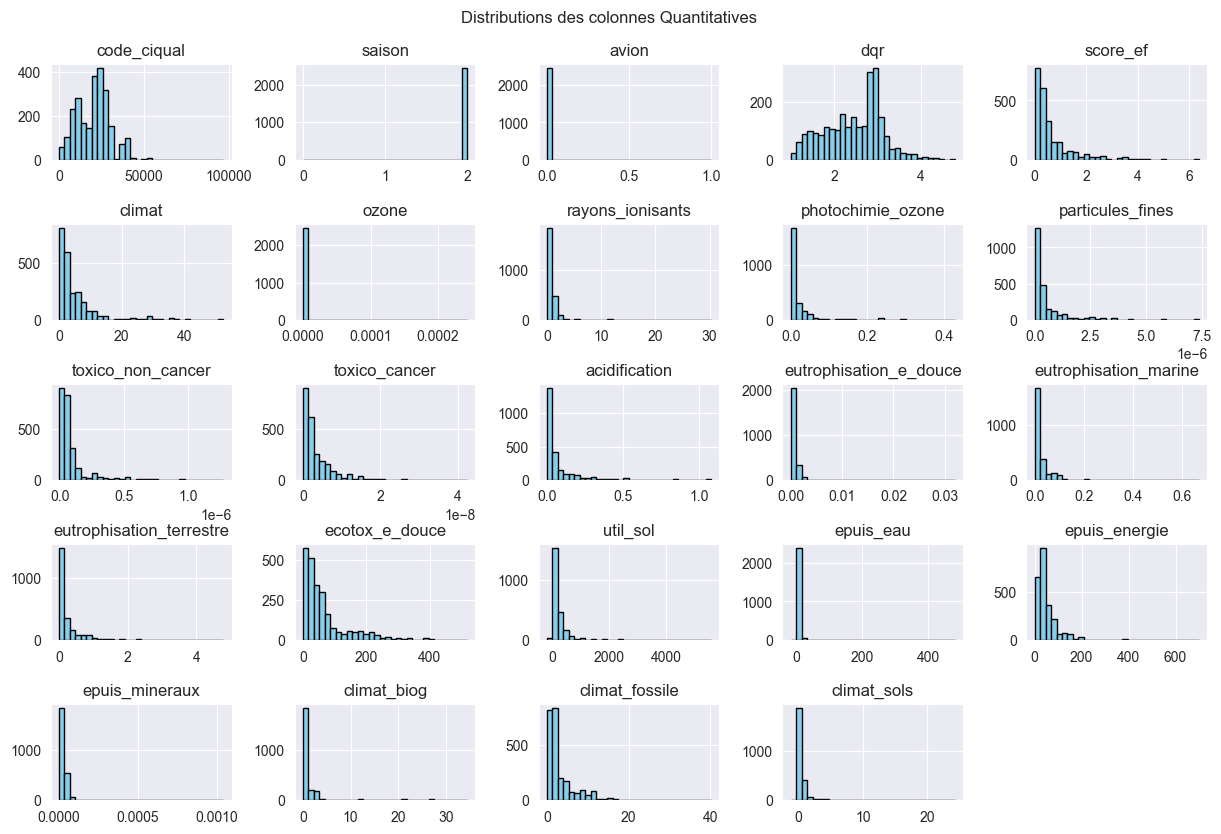

In [7]:
axes = df[quantitative_cols].hist(
    bins=30, figsize=(12, 8), color="skyblue", edgecolor="black"
)

plt.suptitle("Distributions des colonnes Quantitatives", y=1.02)
plt.tight_layout(pad=0.1)
plt.show()


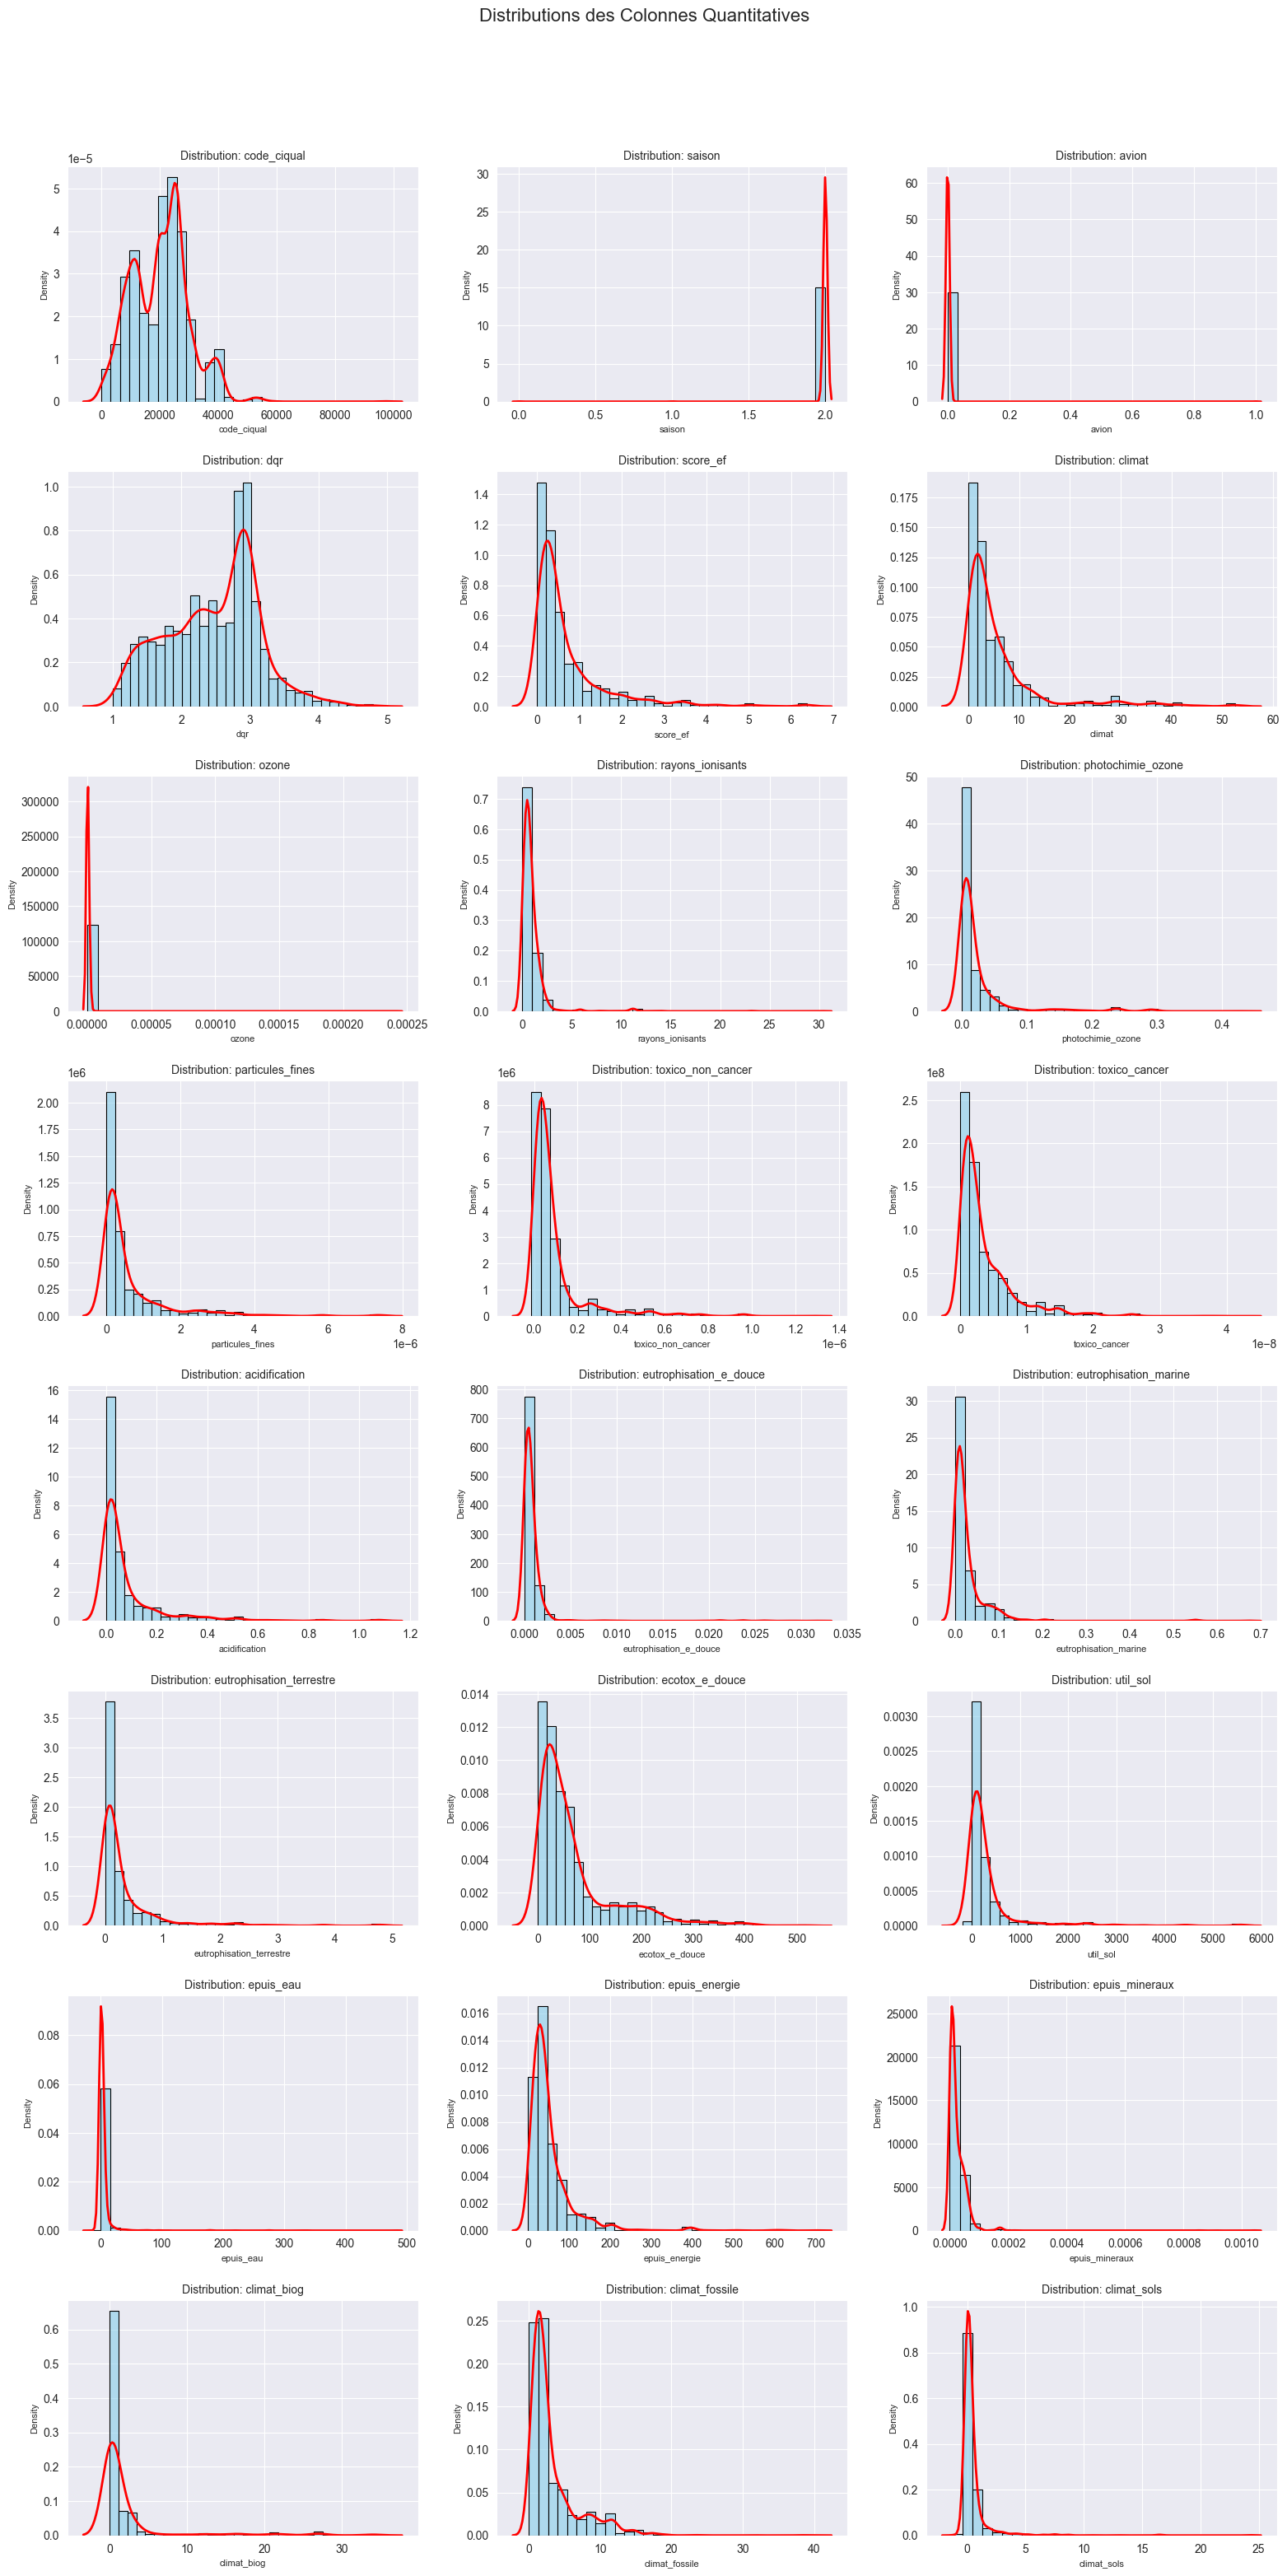

In [8]:
n_cols = len(quantitative_cols)
n_rows = math.ceil(n_cols / 3)
fig, axes = plt.subplots(n_rows, 3, figsize=(16, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(quantitative_cols):
    sns.histplot(
        df[col].dropna(),
        bins=30,
        color="skyblue",
        edgecolor="black",
        stat="density",
        kde=False,
        alpha=0.6,
        ax=axes[i]
    )
    # KDE rouge
    sns.kdeplot(
        df[col].dropna(),
        color="red",
        linewidth=2,
        ax=axes[i]
    )

    axes[i].set_title(f"Distribution: {col}", fontsize=10)
    axes[i].set_xlabel(col, fontsize=8)
    axes[i].set_ylabel("Density", fontsize=8)


fig.suptitle("Distributions des Colonnes Quantitatives", fontsize=16)
plt.tight_layout(pad=2.0)
plt.subplots_adjust(top=0.92)
plt.show()


## LORENZO COURS DE STATS LA

| Méthode                      | Quand l’utiliser                                     | Avantages                                                            |
| ---------------------------- | ---------------------------------------------------- |----------------------------------------------------------------------|
| **StandardScaler (Z-score)** | Données **gaussiennes (normales)**                   | Centre les données ($\mu=0$) et les met à échelle unité ($\sigma=1$) |
| **MinMaxScaler**             | Variables **bornées** ou pour réseaux de neurones    | Toutes les valeurs entre $[0, 1]$                                    |
| **RobustScaler**             | **Présence d’outliers**                              | Utilise **médiane** et **IQR** → résistant aux valeurs extrêmes      |
| **Log Transform**            | Variables **positives et skewed**         | Réduit la skewness, rapproche la distribution d’une loi normale      |
| **QuantileTransformer**      | Données **très asymétriques ou non linéaires**       | Transforme pour suivre une distribution cible (normale ou uniforme)  |

---

### Définitions

- **IQR** → *InterQuartile Range* (étendue interquartile) : $IQR = Q_3 - Q_1$
- **skewed** → mesure l’**asymétrie** d’une distribution par rapport à une normale :
  - skewness > 0 : queue à droite
  - skewness < 0 : queue à gauche
- **outliers** → valeurs aberrantes. Sur un boxplot : ce sont les **points isolés** hors des moustaches ($(Q_1 - 1.5 \cdot IQR$) ou $Q_3 + 1.5 \cdot IQR$)

---

### Formules de skewness

- **Skewness classique** (Pandas `df.skew()`):
$$g_1 = \frac{\tfrac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^3}{s^3}$$
  où
$$s = \sqrt{\frac{1}{n-1} \sum_{i=1}^n \left(x_i-\bar{x}\right)^2}$$

- **Skewness corrigée (Fisher-Pearson)** (SciPy `scipy.stats.skew(..., bias=False)`):
$$G_1 = \frac{n}{(n-1)(n-2)} \sum_{i=1}^n \left( \frac{x_i - \bar{x}}{s} \right)^3$$
  ou encore
$$G_1 = \frac{n}{(n-1)(n-2)} \cdot g_1$$


### N.B
L’avantage du **Fisher-Pearson** est qu’il corrige le biais dû à la taille de l’échantillon. Cela le rend plus fiable quand :
- Les distributions sont loin d’être normales
- Les échantillons sont petits
- Il y a des outliers


In [9]:
for qcol in quantitative_cols:
    print(f"Quantitative: {qcol}")
    print(df[qcol].min(), df[qcol].max())


Quantitative: code_ciqual
1.0 96778.0
Quantitative: saison
0.0 2.0
Quantitative: avion
0.0 1.0
Quantitative: dqr
1.0 4.79
Quantitative: score_ef
0.000104 6.38
Quantitative: climat
0.000342 52.5
Quantitative: ozone
1.04e-11 0.000243
Quantitative: rayons_ionisants
0.000288 30.3
Quantitative: photochimie_ozone
1.87e-06 0.43
Quantitative: particules_fines
3.56e-11 7.37e-06
Quantitative: toxico_non_cancer
-1.18e-08 1.28e-06
Quantitative: toxico_cancer
2.95e-12 4.25e-08
Quantitative: acidification
1.81e-06 1.08
Quantitative: eutrophisation_e_douce
1.09e-07 0.032
Quantitative: eutrophisation_marine
4.85e-07 0.67
Quantitative: eutrophisation_terrestre
4.87e-06 4.79
Quantitative: ecotox_e_douce
0.00271 518.0
Quantitative: util_sol
-203.0 5580.0
Quantitative: epuis_eau
-17.2 481.0
Quantitative: epuis_energie
0.00963 700.0
Quantitative: epuis_mineraux
2.47e-09 0.00104
Quantitative: climat_biog
4.45e-07 34.4
Quantitative: climat_fossile
0.000341 40.2
Quantitative: climat_sols
-1.25 24.3


Ici on peut noter des colonnes à très faibles valeurs, ce qui peut causer des erreurs lors de la manipulation des données (car des valeurs trop petite même en float sont affecté par le niveau de précision des ordinateurs) il est donc préférable des les multiplier par un certains facteurs

**ATTENTION**

Quand on va feed le modèle, il faudra prendre en compte ce facteur, car si le modèles est entrainé pour $x \in [k \cdot 10^{-3}, k]$, il faudra lui donner des entrées sous la même intervalles de données (si ça fait sens)

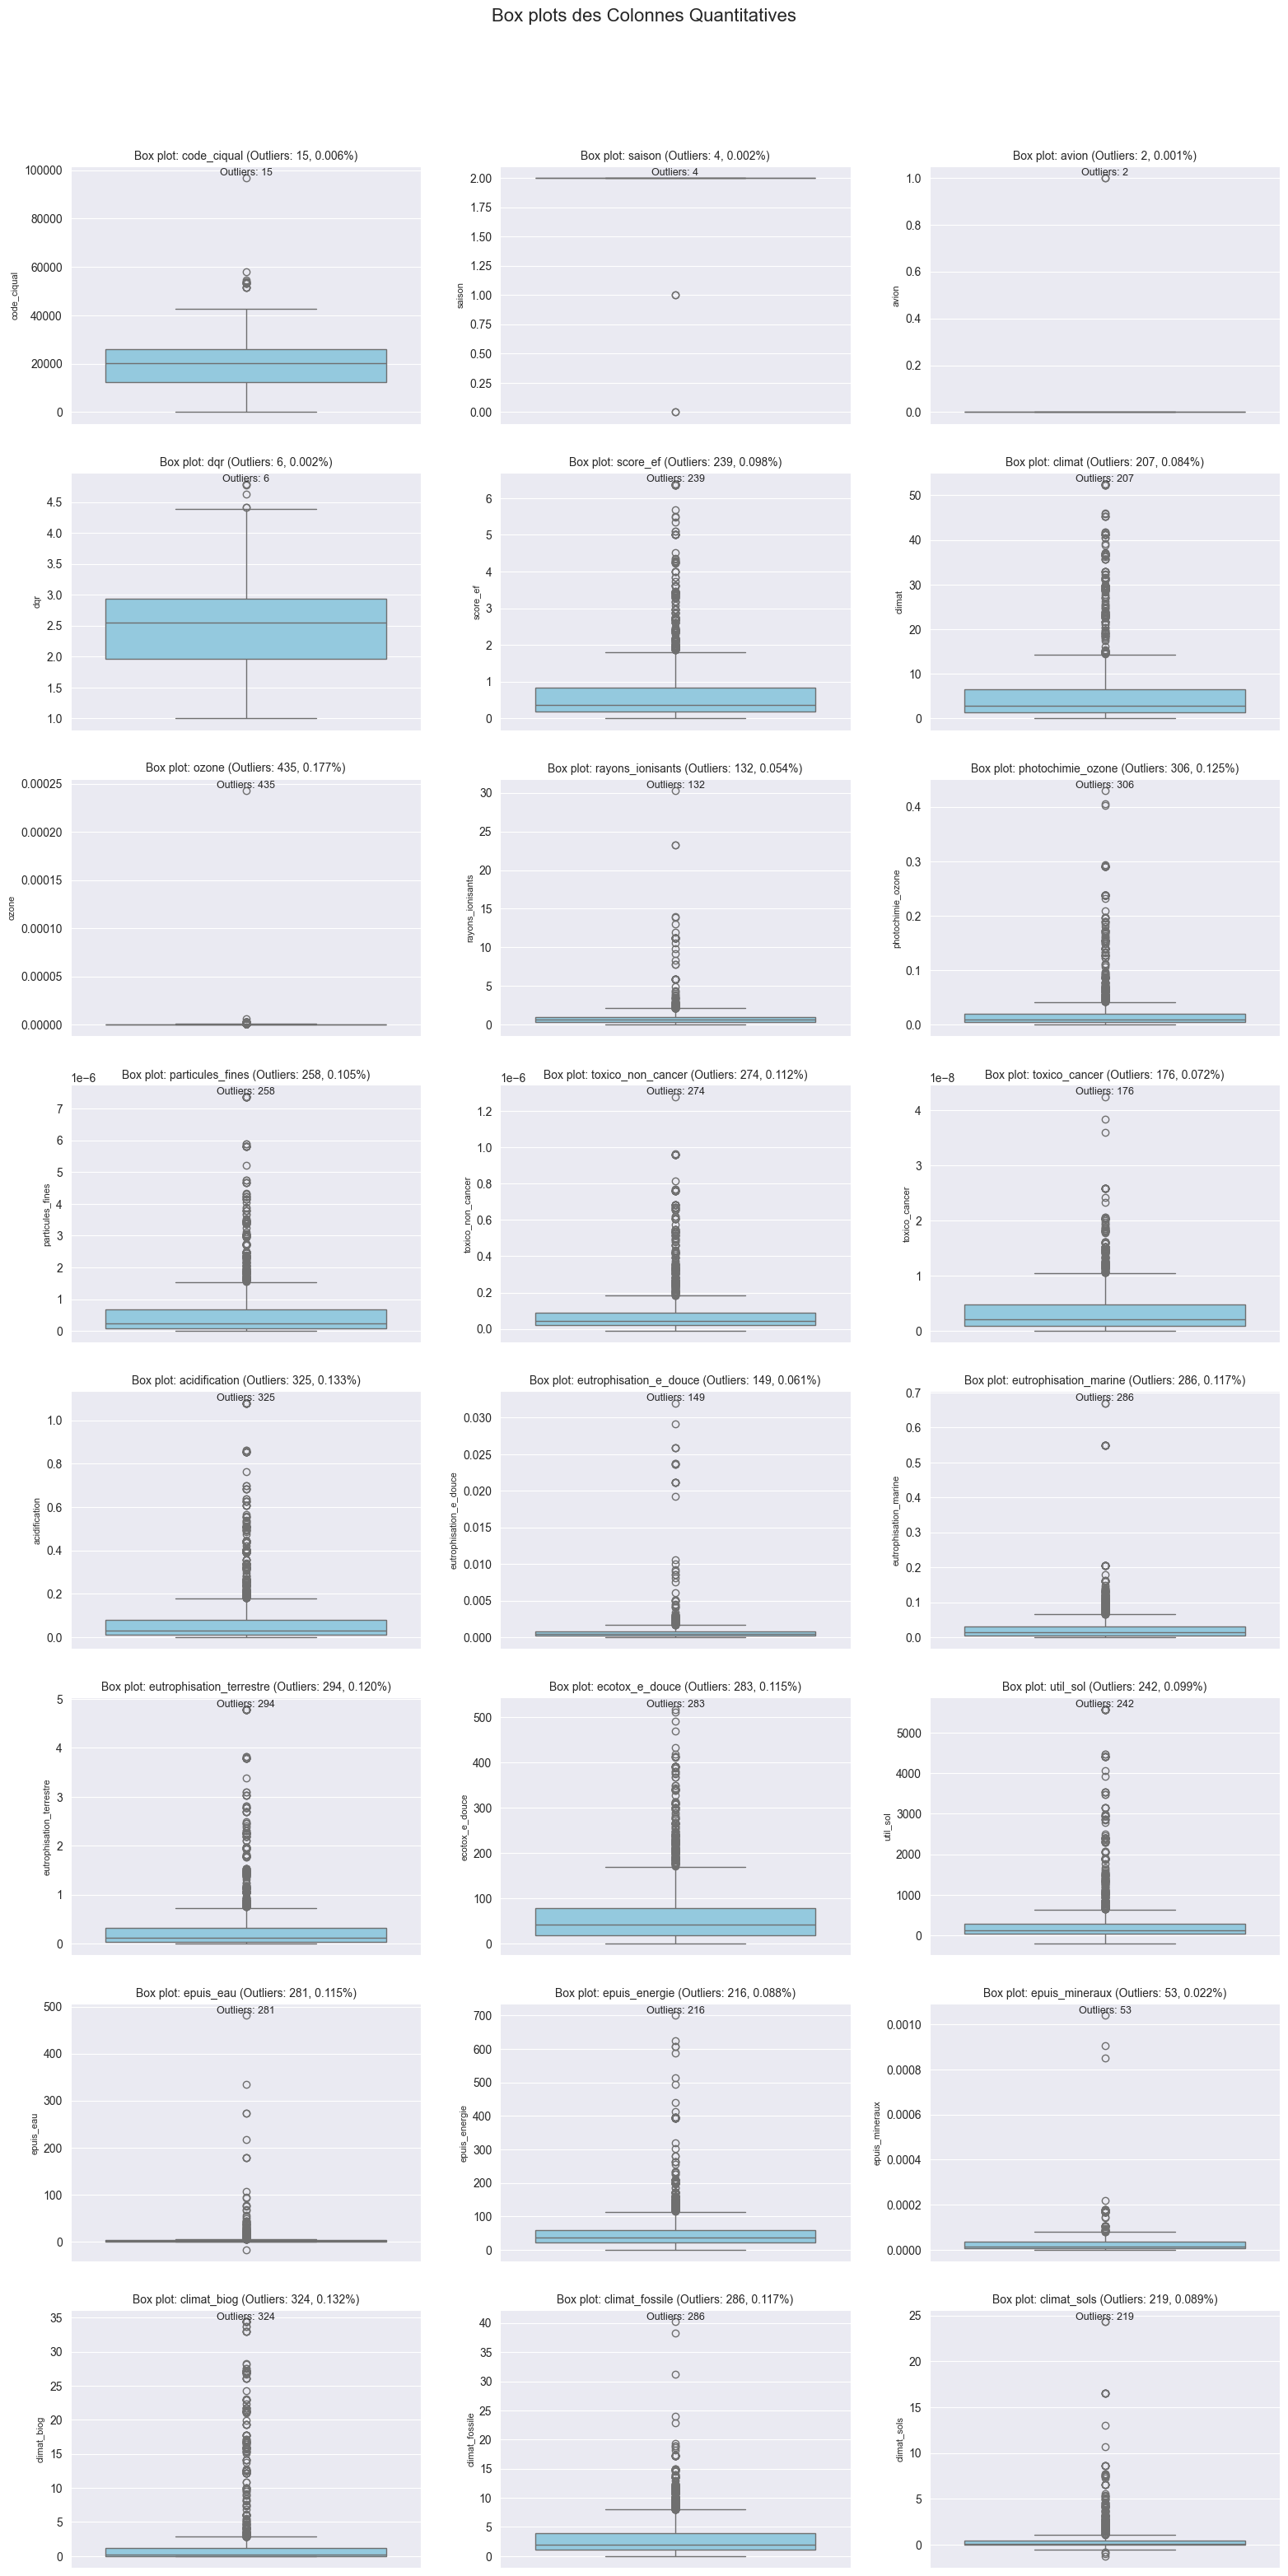

In [10]:
n_cols = len(quantitative_cols)
n_rows = math.ceil(n_cols / 3)
fig, axes = plt.subplots(n_rows, 3, figsize=(16, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(quantitative_cols):
    data = df[col].dropna()

    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data < lower_bound) | (data > upper_bound)]
    n_outliers = len(outliers)
    percent_outliers = n_outliers / len(data)

    sns.boxplot(
        y=data,
        color="skyblue",
        ax=axes[i]
    )

    axes[i].set_title(f"Box plot: {col} (Outliers: {n_outliers}, {percent_outliers:.3f}%)", fontsize=10)
    axes[i].set_ylabel(col, fontsize=8)
    axes[i].set_xlabel("")
    ymax = data.max()
    axes[i].text(0, ymax, f"Outliers: {n_outliers}", fontsize=9, ha='center', va='bottom')

fig.suptitle("Box plots des Colonnes Quantitatives", fontsize=16)
plt.tight_layout(pad=2.0)
plt.subplots_adjust(top=0.92)
plt.show()


Au vue de la répartition des données on peut soupçonné des colonnes catégorisé (par exemple si on a différent type, on peut dire que 1 = type 1; 2 = type 2; etc. Ou encore 0 = faux et 1 = Vrai.

Les colonnes suspectes sont :
- Saison
- Avion
- (je vais inclure ozone en guise de comparaison de comment spot les catégorisation des autres données)

In [11]:
sus = ['saison', 'avion', 'ozone']
for col in sus:
    unique_vals = df[col].dropna().unique()
    n_unique = len(unique_vals)
    n_total = len(df[col].dropna())
    print(f"{col}: {n_unique} unique values out of {n_total} total rows")


saison: 3 unique values out of 2451 total rows
avion: 2 unique values out of 2451 total rows
ozone: 867 unique values out of 2451 total rows


In [12]:

for col in sus:
    data = df[col].dropna()
    decimals = data % 1
    max_frac = decimals.max()
    min_frac = decimals.min()
    print(f"{col}: max partie décimale = {max_frac}, min partie décimale = {min_frac}")

saison: max partie décimale = 0.0, min partie décimale = 0.0
avion: max partie décimale = 0.0, min partie décimale = 0.0
ozone: max partie décimale = 0.000243, min partie décimale = 1.04e-11


Ozone contient des parties décimales et donc n'est pas une échelle de catégorie.
Attention rarement les catégorie sont décimales, mais ça peut exister, mais on constatera un écart décimal constant ou de l'ordre de $k \cdot écart$

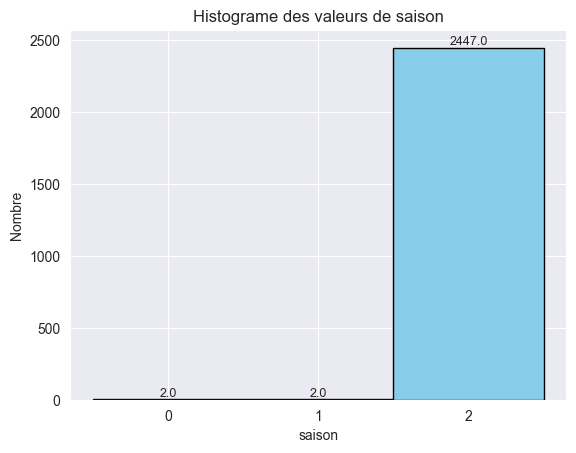

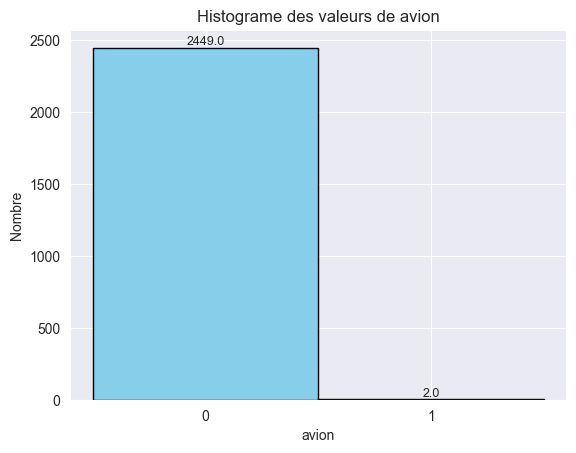

In [13]:
sus.remove('ozone')

for col in sus:
    data = df[col].dropna()
    unique_vals = sorted(data.unique())
    bins = [x - 0.5 for x in range(int(min(unique_vals)), int(max(unique_vals)) + 2)]

    counts, _, patches = plt.hist(data, bins=bins, edgecolor='black', color='skyblue')
    plt.xticks(range(int(min(unique_vals)), int(max(unique_vals)) + 1))
    plt.xlabel(col)
    plt.ylabel("Nombre")
    plt.title(f"Histograme des valeurs de {col}")

    for count, patch in zip(counts, patches):
        if count > 0:
            plt.text(patch.get_x() + patch.get_width() / 2, count, str(count),
                     ha='center', va='bottom', fontsize=9)

    plt.show()


Ce sont des données catégorique, mais leurs répartitions est très très mauvaise. A la vue de la répartition, ces données ne semble, de prime à bord, pas exploitable.
Une première hypothèse de les supprimer.

Avant des les supprimer il reste important de mesurer la corrélation.

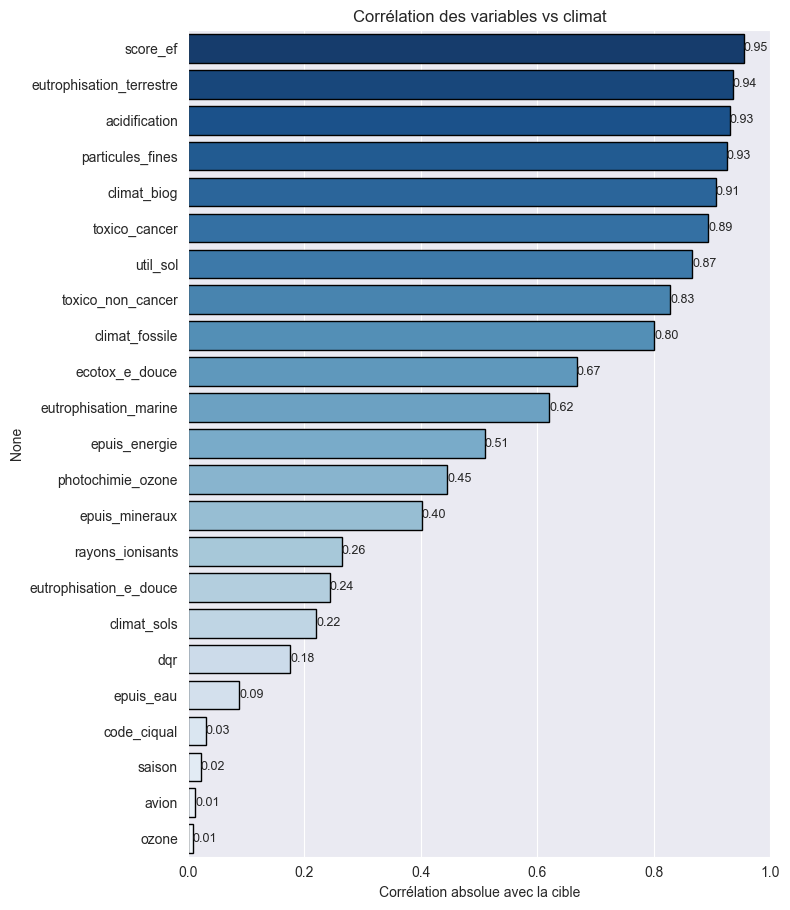

In [14]:
tmp_cols = quantitative_cols.values.tolist().copy()

if TARGET in tmp_cols:
    tmp_cols.remove(TARGET)

corr_target = df[tmp_cols + [TARGET]].corr()[TARGET].drop(TARGET)
corr_target = corr_target.abs().sort_values(ascending=False)

plt.figure(figsize=(8, len(corr_target) * 0.4))
sns.barplot(
    x=corr_target.values,
    y=corr_target.index,
    hue=corr_target.index,
    palette="Blues_r",
    edgecolor="black",
    dodge=False,
    legend=False
)

for i, v in enumerate(corr_target.values):
    plt.text(v, i, f"{v:.2f}", va='center', ha='left', fontsize=9)

plt.xlabel("Corrélation absolue avec la cible")
plt.title(f"Corrélation des variables vs {TARGET}")
plt.tight_layout()
plt.show()


Avant même de faire l'analyse de corrélation via un RandomTree Classifier (par exemple, approche prédictive) voici à quoi la corrélation absolue (approche statistique) entre les variables et la colonne cible.
On peut déjà avoir une première intuition sur quelles seront les variables les plus impactante sur le résultat.
Chose qui sere à vérifier avec les modèles prédictifs.

Encore une fois Saison et avions sont dans le fond du panier, ce qui renforce notre hypothèse.

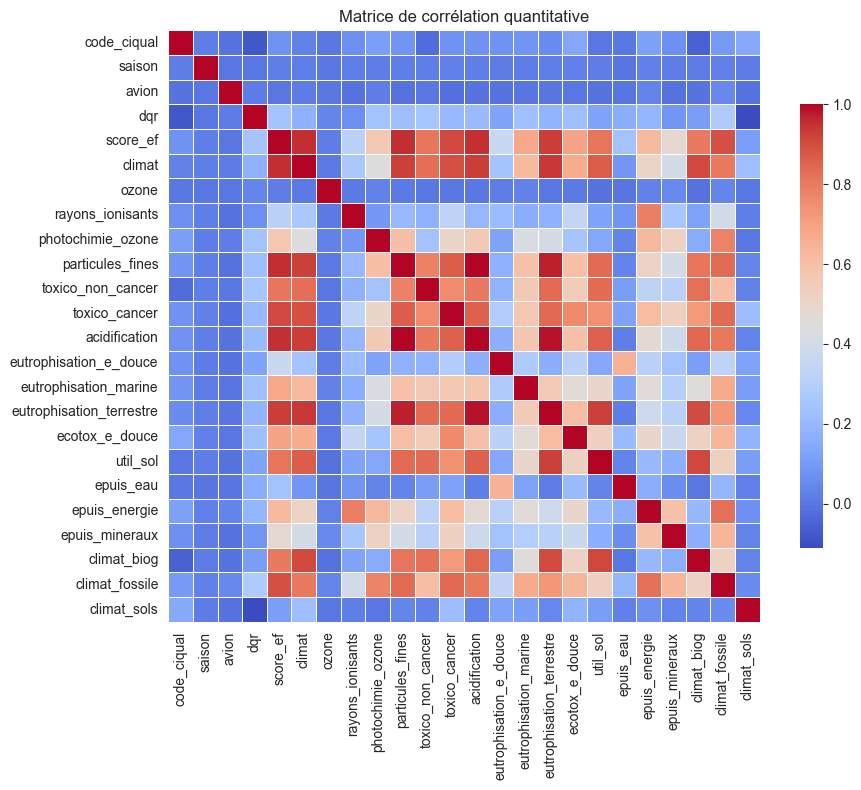

In [15]:
corr_matrix = df[quantitative_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=False,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": 0.75},
    linewidths=0.5
)

plt.title("Matrice de corrélation quantitative")
plt.tight_layout()
plt.show()

Ici on regarde la corrélation de l'ensemble des données afin de voir comment les colonnes sont correllées entre-elles.
Car certes on a regardé par rapport à notre colonne (ce qui est une vue plus précise de la 6eme ligne ici soit le climat).
Mais si on souhaitait écarter des valeurs car on juge qu'elles ne sont que trop faiblement correllés avec notre cible, il est bon d'également vérifier comment elle se corrèle aux autres colonnes.

Une corrélation forte avec une autre colonnes montre une dépendance entre ces colonnes, soit, selon les cas elle peut s'avérer importante.
Là où une corrélation faible montre qu'elle est indépendante des autres et si elle l'es également de la cible alors l'hypothèse de la supprimer pour aider le modèle prédictif se renforce.

Ici par exemple on pourrait éventuellement supprimer :
- code_ciqual
- saison (on renforce encore l'hypothèse)
- avion (on renforce encore l'hypothèse)
- ozone
- climat_sols

Et éventuellement :
- dqr

## Analyse Qualitative

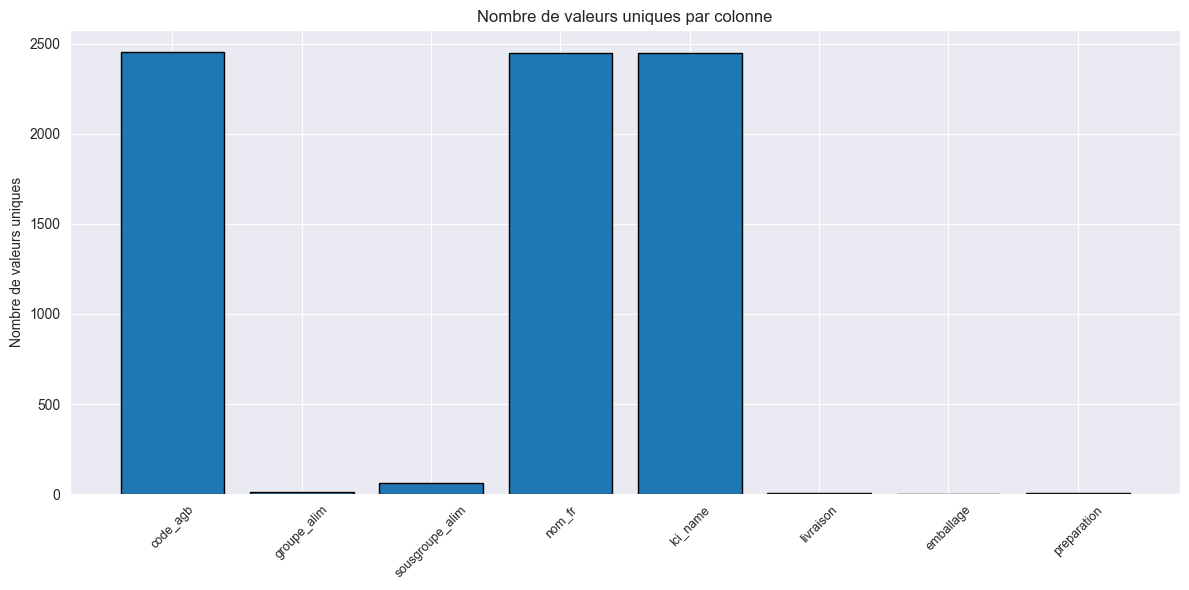

In [19]:
unique_counts = df[qualitative_cols].nunique()

plt.figure(figsize=(12, 6))
plt.bar(unique_counts.index, unique_counts.values, edgecolor="black")

plt.xticks(rotation=45, fontsize=9)
plt.ylabel("Nombre de valeurs uniques")
plt.title("Nombre de valeurs uniques par colonne")
plt.tight_layout()

plt.show()


Je vais retirer :
- ode_agb
- nom_fr
- lci_name

car ce sont des catégories avec des valeurs unique à chaque entrée donc pas intéressant de se pencher dessus.

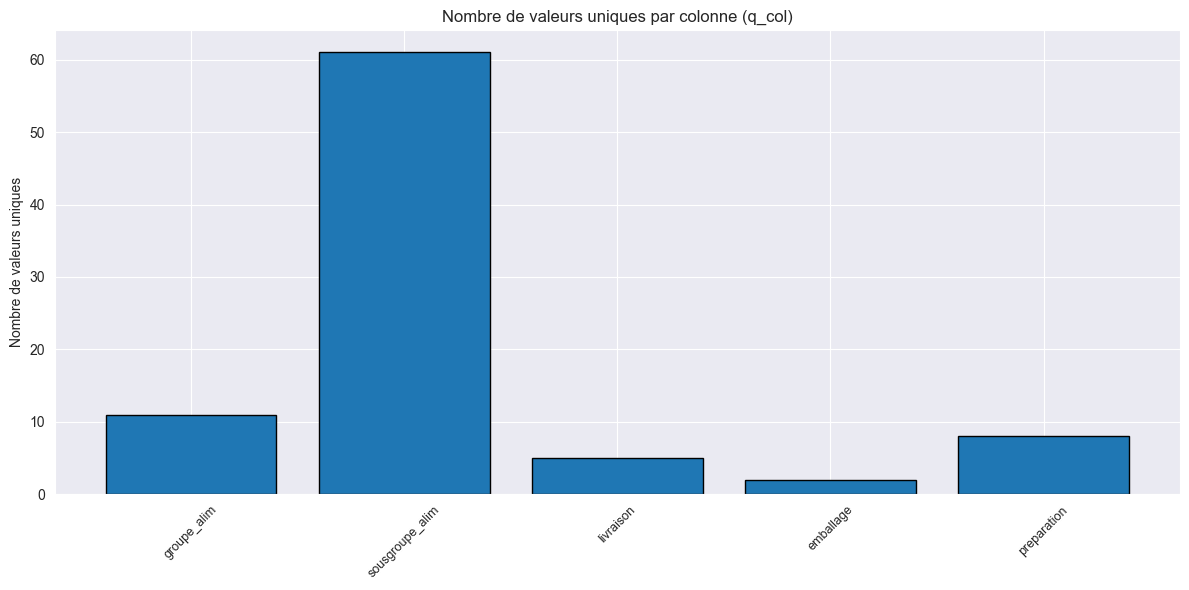

In [20]:
q_col = [col for col in df[qualitative_cols] if col not in ['code_agb', 'nom_fr', 'lci_name']]
unique_counts = df[q_col].nunique()

plt.figure(figsize=(12, 6))
plt.bar(unique_counts.index, unique_counts.values, edgecolor="black")

plt.xticks(rotation=45, fontsize=9)
plt.ylabel("Nombre de valeurs uniques")
plt.title("Nombre de valeurs uniques par colonne (q_col)")
plt.tight_layout()

plt.show()


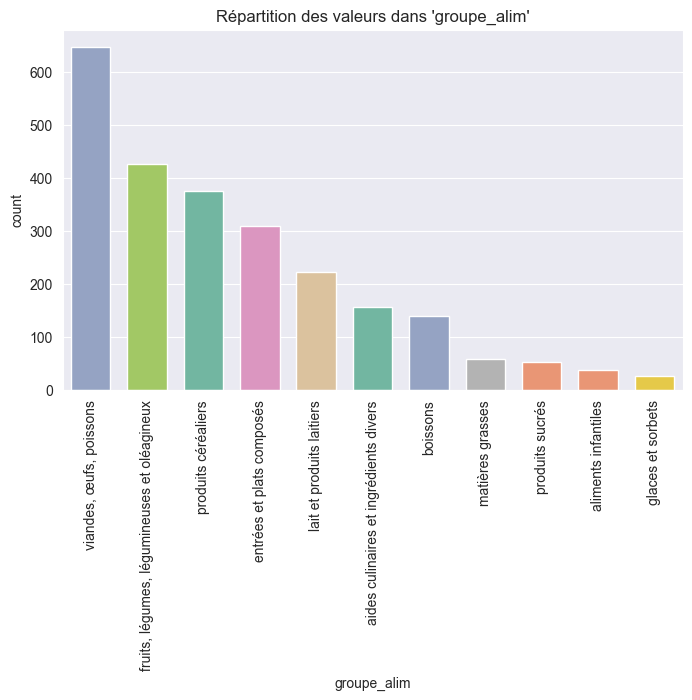

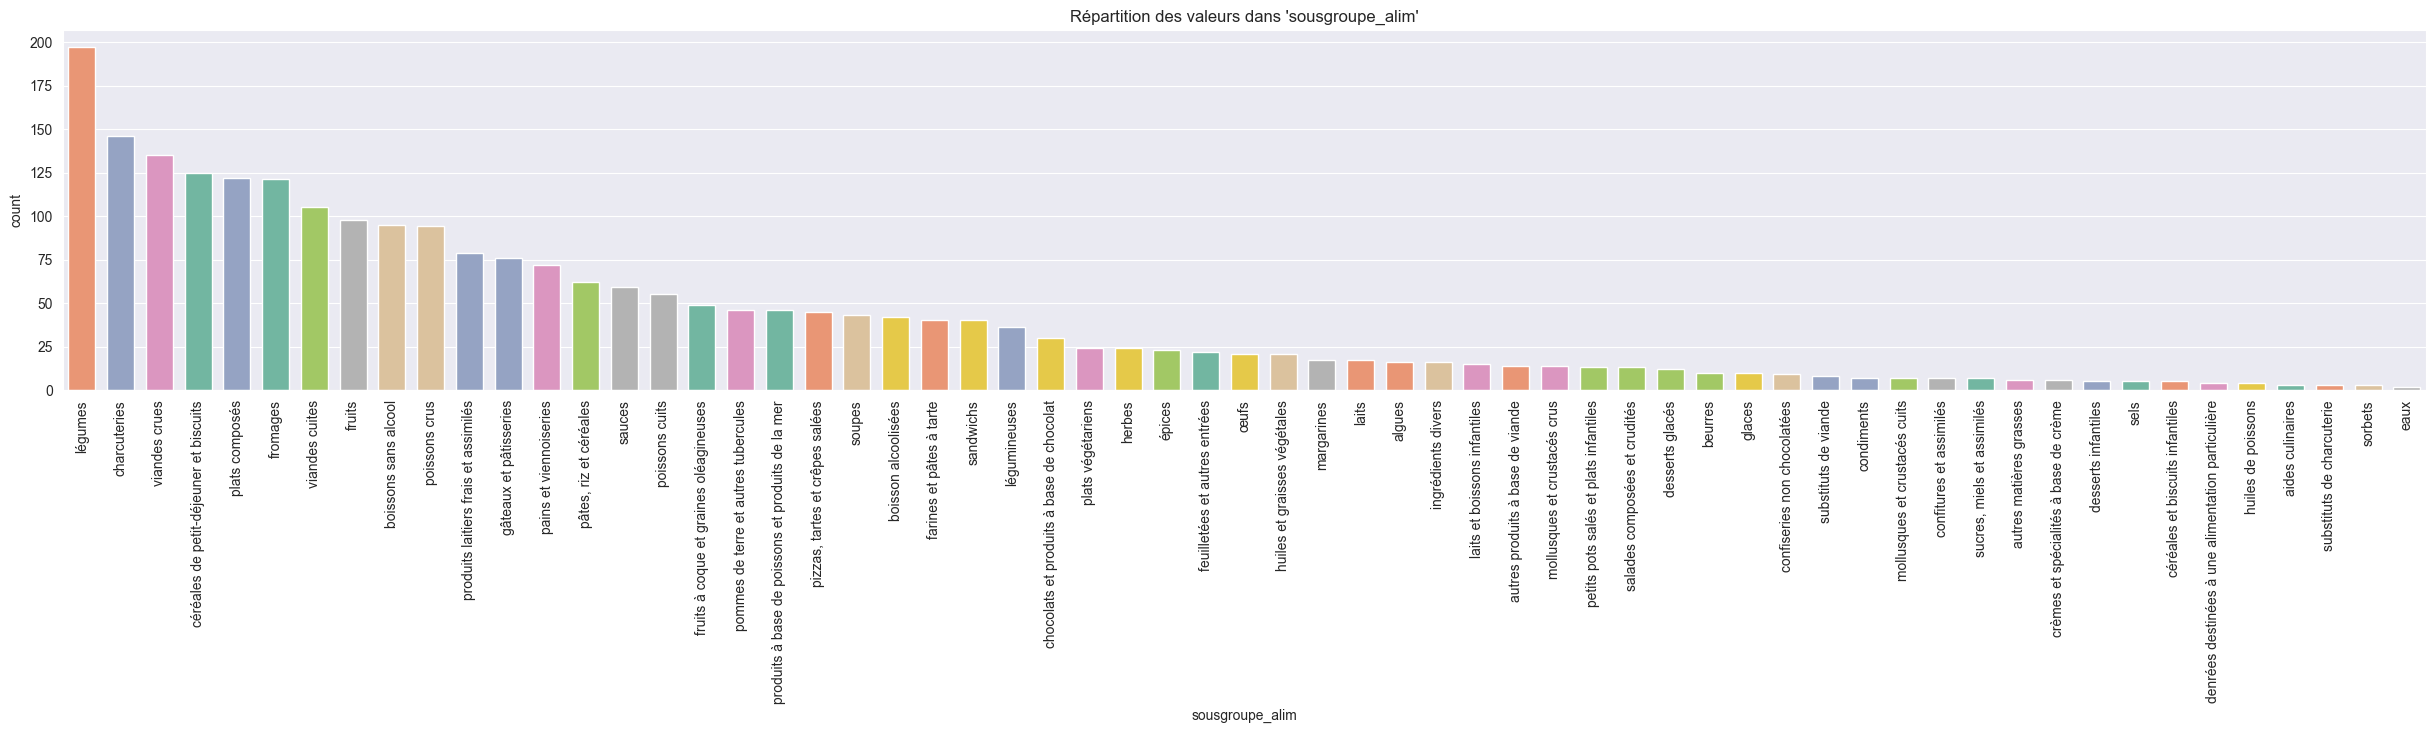

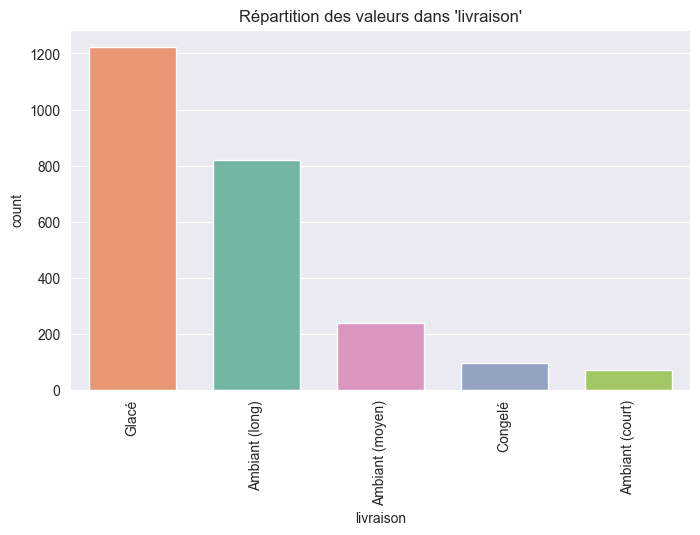

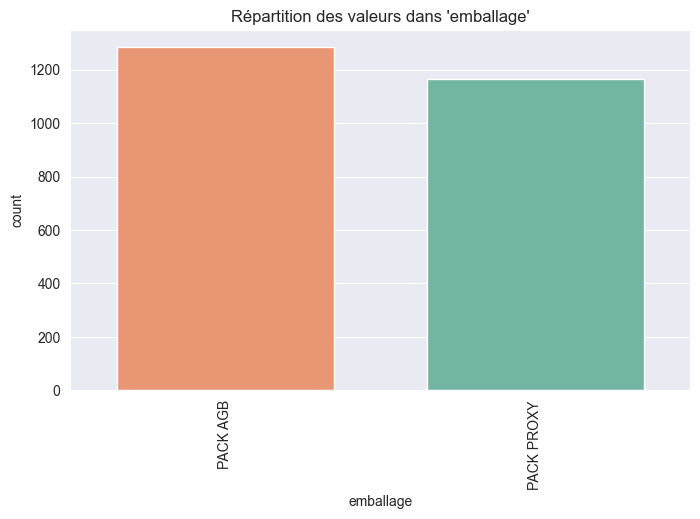

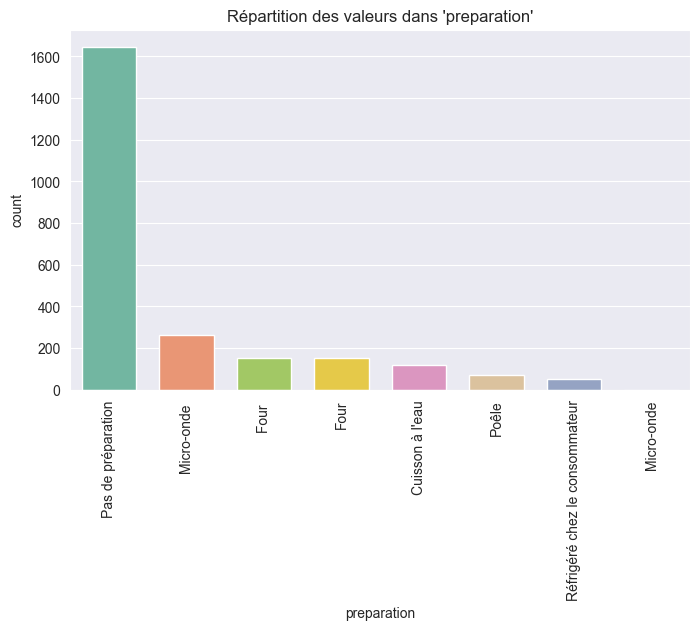

In [18]:
for col in q_col:
    n_categories = df[col].nunique()
    plt.figure(figsize=(max(8, n_categories * 0.5), 6))

    sns.countplot(
        data=df,
        x=col,
        hue=col,
        order=df[col].value_counts().index,
        palette="Set2",
        legend=False,
        width=0.7
    )

    plt.title(f"Répartition des valeurs dans '{col}'")
    plt.xticks(rotation=90, ha="center")

    plt.subplots_adjust(bottom=0.3, top=0.9)
    plt.show()
